# cluster analysis 2017 season

In [475]:
import sys
import os
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy
import zipfile
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sn
from sklearn.metrics import silhouette_samples, silhouette_score


sys.setrecursionlimit(100000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [476]:
pwd

'/Users/stefanostselios/Desktop/nhl_roster_design-master'

### import 2017 data

In [477]:
da = pd.read_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/stats/2017_player_stats.csv')
#da = pd.read_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/stats/2017_player_stats.csv')
da = da.drop('Unnamed: 0', axis=1)

In [478]:
da.shape

(1066, 48)

# Forwards

In [479]:
dfs = da.copy()
dfs = dfs[(dfs['Position'] != 'D') & (dfs['Position'] != 'G') ]
dfs = dfs.sort_values(['TPoints'], ascending=[False])
dfs.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
103,2017,EDM,CONNOR MCDAVID,C,82,41.0,67.0,108.0,120.0,80.0,98.0,70.0,28.0,233.0,1115,883,232,882,821,61,46.0,28.0,14.0,111.0,67.0,82.0,1767.0,0.023203,0.037917,0.061121,0.067912,0.045274,0.055461,0.039615,0.015846,0.131862,0.631013,0.499717,0.131296,0.499151,0.464629,0.034522,0.026033,0.015846,0.007923,0.062818,0.037917,0.046406
116,2017,PHI,CLAUDE GIROUX,C,82,34.0,68.0,102.0,129.0,62.0,80.0,54.0,26.0,159.0,1040,707,333,715,663,52,23.0,30.0,20.0,34.0,44.0,59.0,1670.0,0.020359,0.040719,0.061078,0.077246,0.037126,0.047904,0.032335,0.015569,0.095210,0.622754,0.423353,0.199401,0.428144,0.397006,0.031138,0.013772,0.017964,0.011976,0.020359,0.026347,0.035329
488,2017,T.B,NIKITA KUCHEROV,W,80,39.0,61.0,100.0,123.0,57.0,78.0,57.0,21.0,240.0,1030,765,265,747,764,-17,15.0,31.0,42.0,66.0,79.0,144.0,1586.0,0.024590,0.038462,0.063052,0.077554,0.035939,0.049180,0.035939,0.013241,0.151324,0.649433,0.482346,0.167087,0.470996,0.481715,-0.010719,0.009458,0.019546,0.026482,0.041614,0.049811,0.090794
55,2017,PIT,EVGENI MALKIN,C,78,42.0,56.0,98.0,119.0,57.0,70.0,56.0,14.0,198.0,1007,696,311,712,694,18,32.0,47.0,87.0,75.0,73.0,67.0,1481.0,0.028359,0.037812,0.066172,0.080351,0.038488,0.047265,0.037812,0.009453,0.133693,0.679946,0.469953,0.209993,0.480756,0.468602,0.012154,0.021607,0.031735,0.058744,0.050641,0.049291,0.045240
229,2017,COL,NATHAN MACKINNON,C,74,39.0,58.0,97.0,125.0,64.0,79.0,61.0,18.0,245.0,881,710,171,640,695,-55,22.0,38.0,55.0,36.0,41.0,109.0,1473.0,0.026477,0.039375,0.065852,0.084861,0.043449,0.053632,0.041412,0.012220,0.166327,0.598099,0.482010,0.116090,0.434487,0.471826,-0.037339,0.014936,0.025798,0.037339,0.024440,0.027834,0.073999


In [480]:
dfs.shape

(640, 48)

### forwards time on ice distribution 

 - The purpose of plotting a histogram, is to view the distribution of games played by all skaters. Players that have played a substainial amount of few minutes are excluded by the data set.

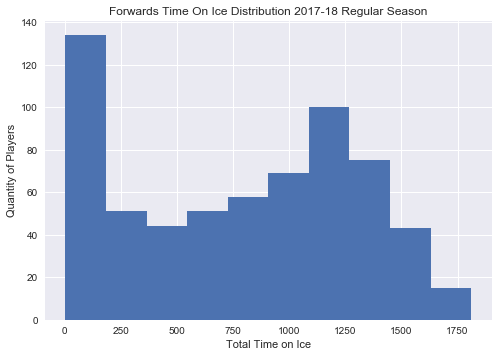

In [481]:
x2 = dfs.TTOI 
plt.title('Forwards Time On Ice Distribution 2017-18 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(180,185)
plt.hist(x2)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_forwards_toi.pdf')
plt.show()

- Players that have played less than 185 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 4th line players.

In [482]:
low = dfs.copy()
low = low[low['TTOI'] < 185]
low.shape

(134, 48)

In [483]:
dfs = dfs[dfs['TTOI'] > 185]

In [484]:
dfs.shape

(506, 48)

In [485]:
#dfs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')
#dfs.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')

## cluster for centers

In [486]:
dc = dfs.copy()
dc = dc[dc['Position'] == 'C']
dc.shape

(206, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [487]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
c = dc[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
c_scaled = scaler.fit_transform(c)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [488]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [489]:
sn.clustermap(c_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [490]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( c_scaled )
  cluster_errors.append( clusters.inertia_ )

In [491]:
clusters_dc = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dc[0:10]

,cluster_errors,num_clusters
0,1648.000000,1
1,1146.414236,2
2,981.737598,3
3,886.988614,4
4,818.197235,5
5,770.871862,6
6,727.828431,7
7,689.655180,8
8,661.051321,9
9,634.560166,10


In [492]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_centers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

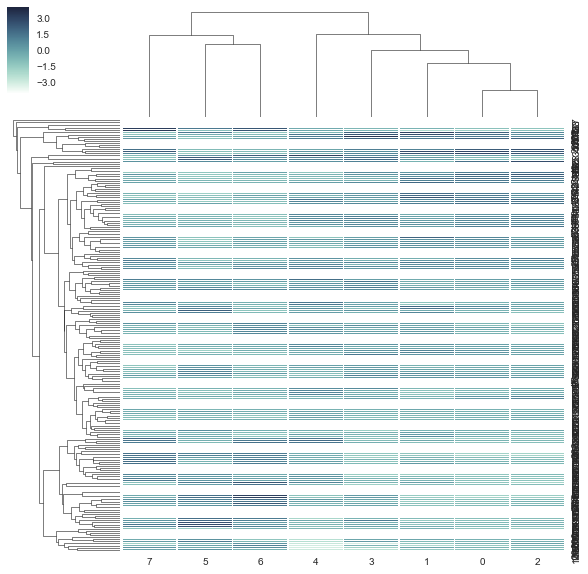

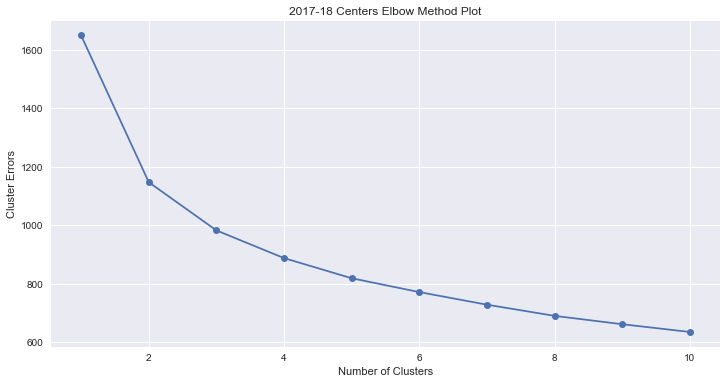

In [493]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dc.num_clusters, clusters_dc.cluster_errors, marker = "o" )
plt.title('2017-18 Centers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_centers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.252212757358
For n_clusters = 3 The average silhouette_score is : 0.186590183619
For n_clusters = 4 The average silhouette_score is : 0.174693597679
For n_clusters = 5 The average silhouette_score is : 0.159870123143
For n_clusters = 6 The average silhouette_score is : 0.149911242227
For n_clusters = 7 The average silhouette_score is : 0.140199218518
For n_clusters = 8 The average silhouette_score is : 0.147829690125
For n_clusters = 9 The average silhouette_score is : 0.140997889678
For n_clusters = 10 The average silhouette_score is : 0.14691621562


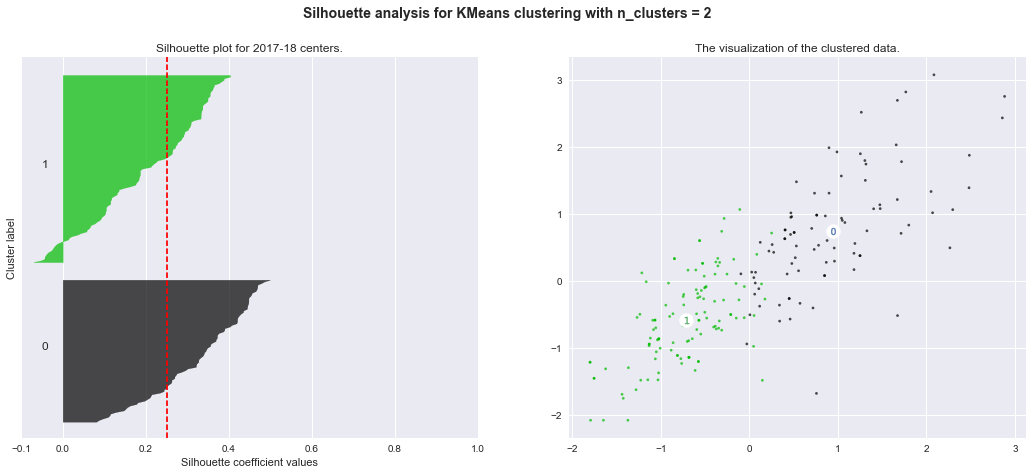

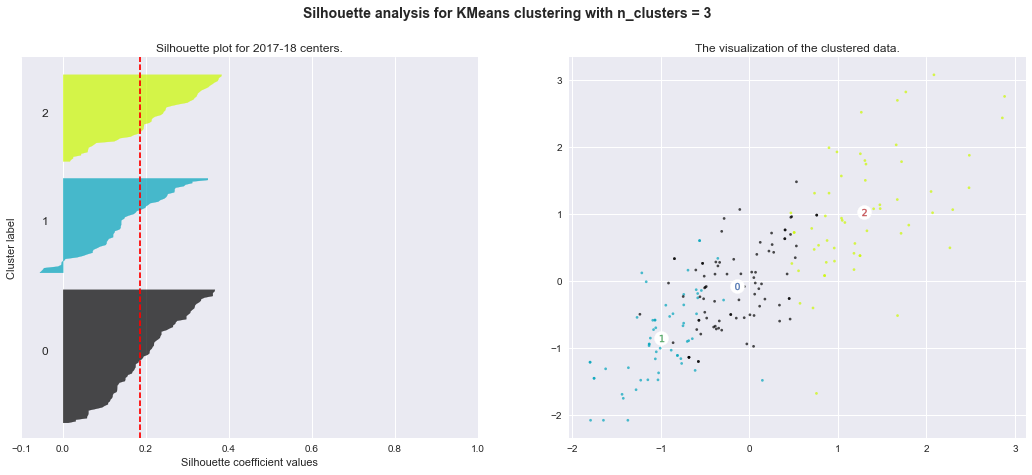

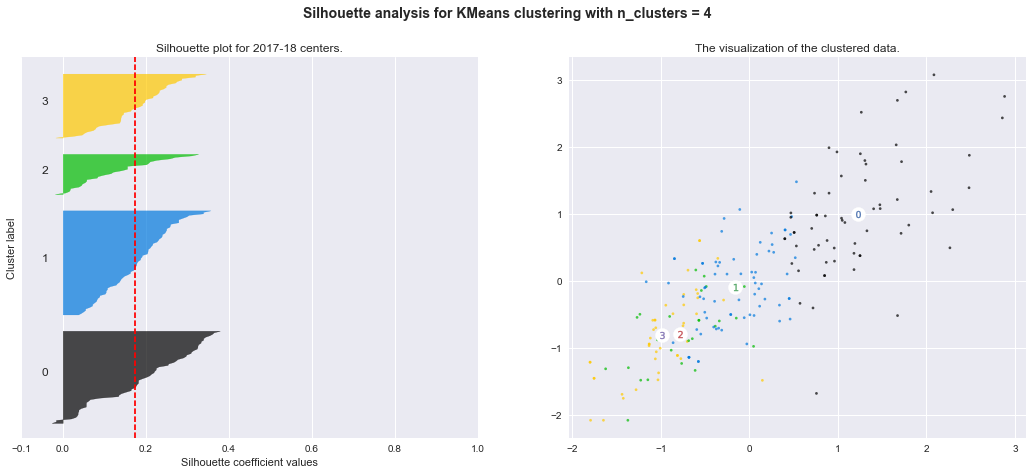

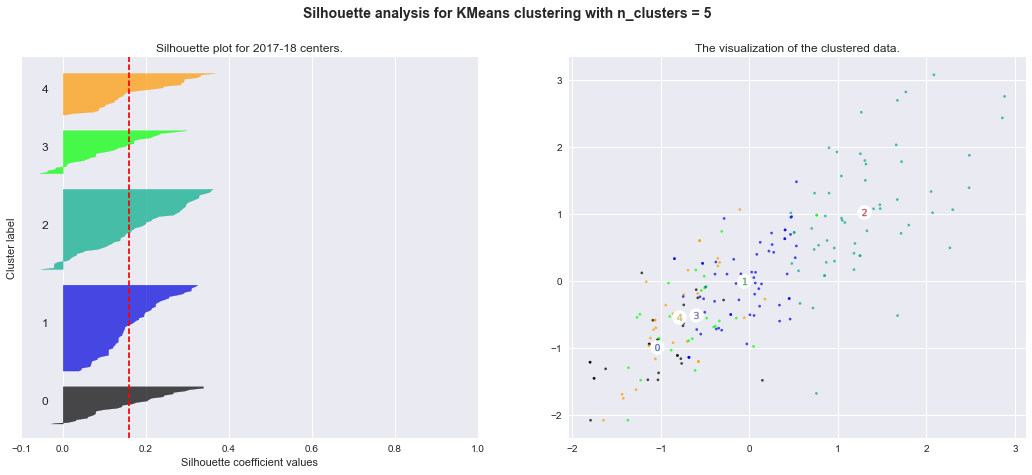

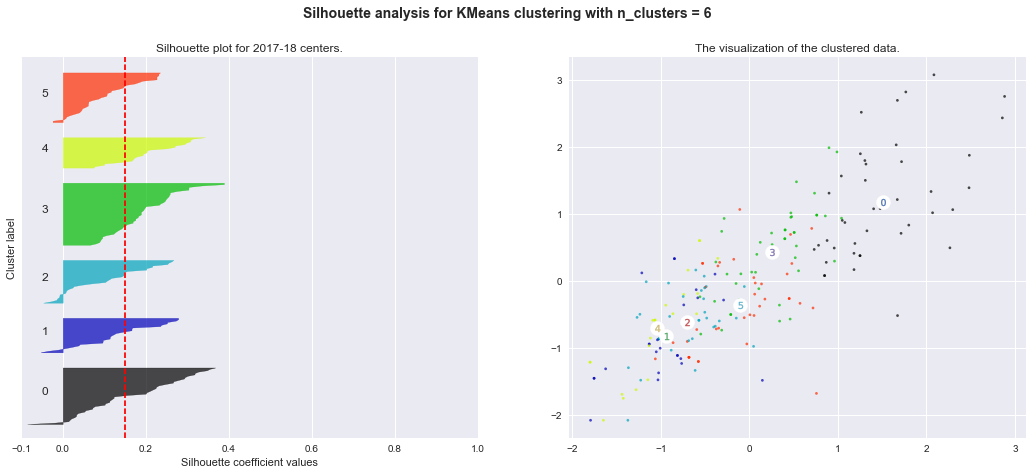

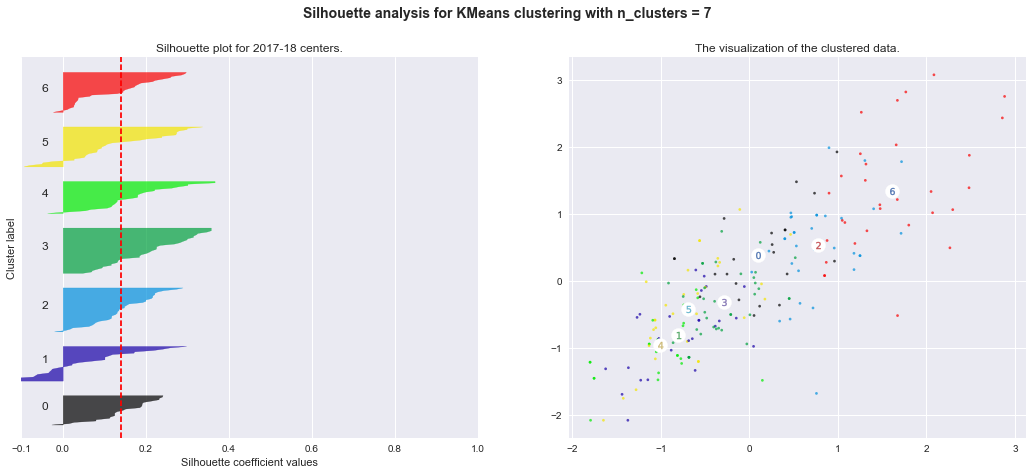

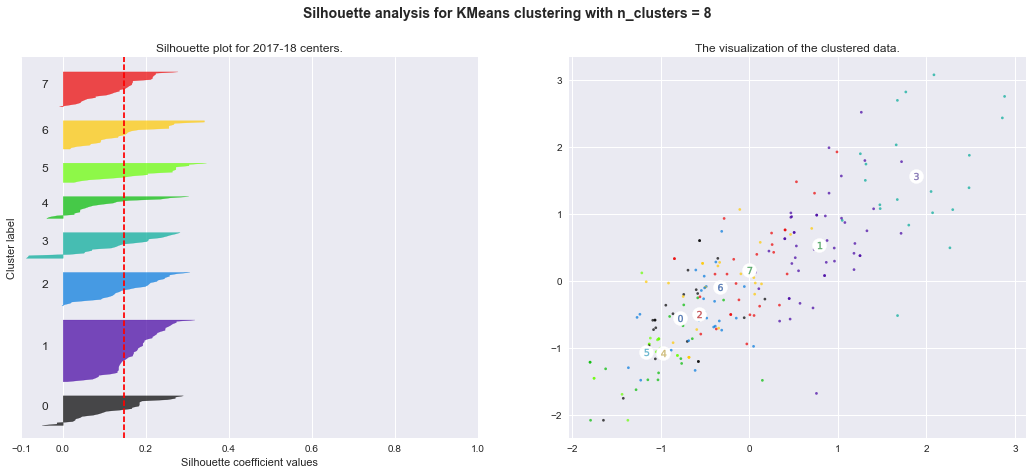

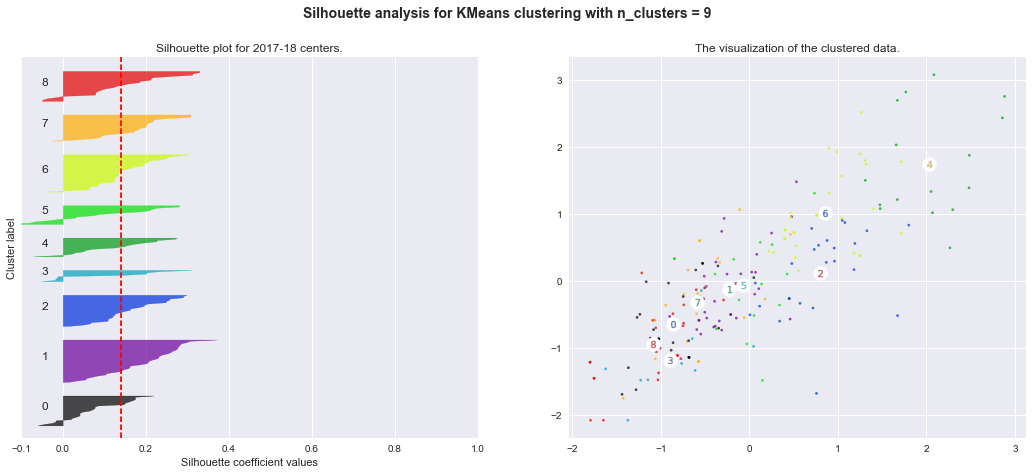

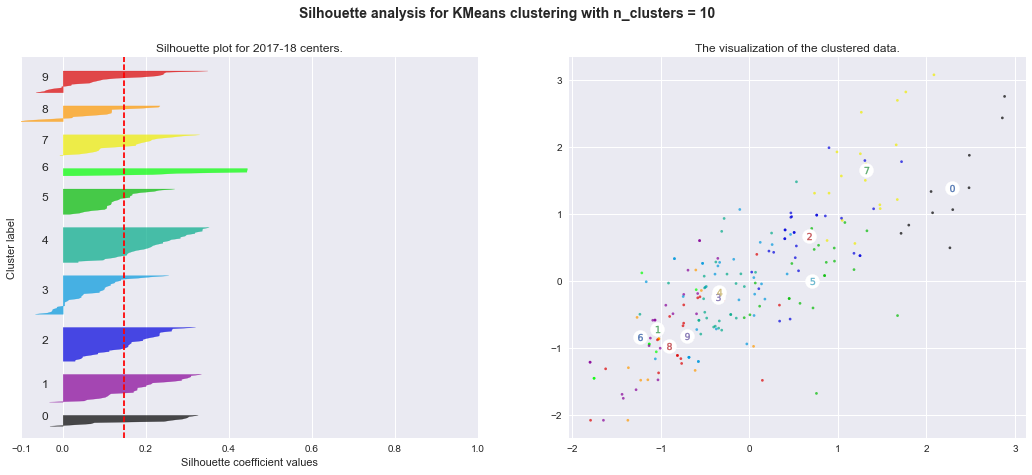

In [494]:
with PdfPages('test.pdf') as pdf:
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2*np.pi*t)
    s = s * 50

cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(c_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( c_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(c_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(c_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2017-18 centers.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(c_scaled[:, 0], c_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_centers_silhouette_analysis.pdf')
plt.show()

In [496]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(c_scaled)

clusters_dc = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dc['cluster']=kmeans.labels_

clusters_dc

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,-0.462281,-0.125172,-0.589698,0.054364,1.035298,0.261426,0.556849,0.626797
1,-1.072008,-1.027947,-0.869553,-0.661254,-0.784917,1.013447,1.198477,0.522798
2,1.376457,1.114655,1.255033,0.802410,0.260578,-0.676321,-0.659414,-0.135282
3,-0.091558,-0.118723,-0.053391,-0.209929,-0.297738,-0.253828,-0.533970,-0.549727


In [504]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_centers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

### rank centers

The next step is to rank players based on clusters:

- **Cluster 2** is for **1st** line (Top 3). 
- **Cluster 1** is for **2nd** second line (Top 6). 
- **Cluster 0** is for **3rd** third line (Top 9)
- **Cluster 3** is for **4th** fourth line (Bottom 3)

In [497]:
dc['Rank'] = dc.apply(lambda x: 1 if (x['cluster'] == 2) else 2 if (x['cluster'] == 3) else 3 if (x['cluster'] == 0) else 4, axis=1)
dc = dc.sort_values(['TPoints'], ascending=[False])
dc['Rank'].value_counts()

2    73
1    51
4    42
3    40
Name: Rank, dtype: int64

In [503]:
c = dc.copy()
c = c[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIEVDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
c = c[c['Rank'] == 1]
c = c.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
c.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIEVDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
103,1,EDM,CONNOR MCDAVID,82,108.0,0.061121,0.023203,0.037917,0.631013,0.499717,0.034522,0.015846,0.067912,0.045274,0.026033,0.015846,1767.0
116,1,PHI,CLAUDE GIROUX,82,102.0,0.061078,0.020359,0.040719,0.622754,0.423353,0.031138,0.015569,0.077246,0.037126,0.013772,0.017964,1670.0
55,1,PIT,EVGENI MALKIN,78,98.0,0.066172,0.028359,0.037812,0.679946,0.469953,0.012154,0.009453,0.080351,0.038488,0.021607,0.031735,1481.0
229,1,COL,NATHAN MACKINNON,74,97.0,0.065852,0.026477,0.039375,0.598099,0.482010,-0.037339,0.012220,0.084861,0.043449,0.014936,0.025798,1473.0
401,1,L.A,ANZE KOPITAR,82,92.0,0.050801,0.019326,0.031474,0.545003,0.464384,0.018222,0.011596,0.059636,0.036444,0.035340,0.027609,1811.0


## clusters for wingers

In [505]:
dw = dfs.copy()
dw = dw[dw['Position'] == 'W']
dw.shape

(300, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [506]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
w = dw[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
w_scaled = scaler.fit_transform(w)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [507]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [508]:
sn.clustermap(w_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [509]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( w_scaled )
  cluster_errors.append( clusters.inertia_ )

In [510]:
clusters_dw = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dw[0:10]

,cluster_errors,num_clusters
0,2400.000000,1
1,1739.794885,2
2,1476.013899,3
3,1275.529941,4
4,1146.013966,5
5,1060.807267,6
6,998.416455,7
7,947.260950,8
8,896.547920,9
9,868.790142,10


In [511]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_wingers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

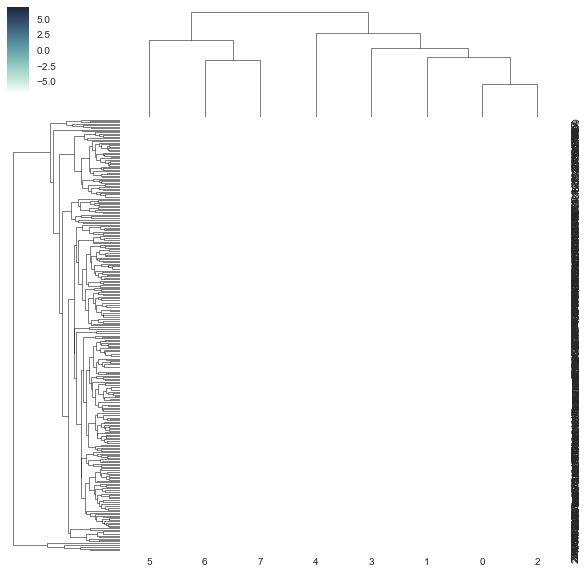

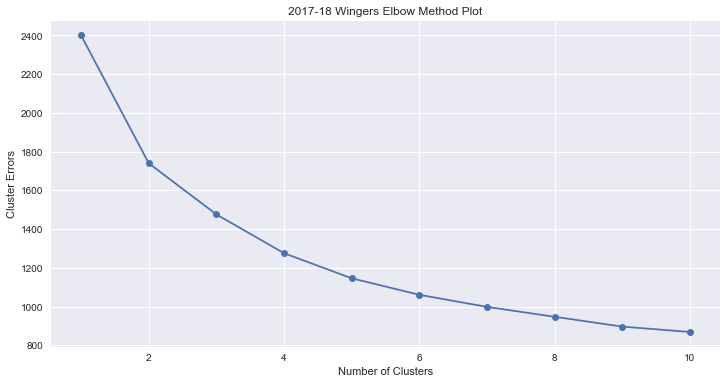

In [512]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dw.num_clusters, clusters_dw.cluster_errors, marker = "o" )
plt.title('2017-18 Wingers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_wingers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.252824719283
For n_clusters = 3 The average silhouette_score is : 0.20063865001
For n_clusters = 4 The average silhouette_score is : 0.203079198322
For n_clusters = 5 The average silhouette_score is : 0.18536727101
For n_clusters = 6 The average silhouette_score is : 0.192036854625
For n_clusters = 7 The average silhouette_score is : 0.179396292165
For n_clusters = 8 The average silhouette_score is : 0.162809966384
For n_clusters = 9 The average silhouette_score is : 0.174553803214
For n_clusters = 10 The average silhouette_score is : 0.162322811941


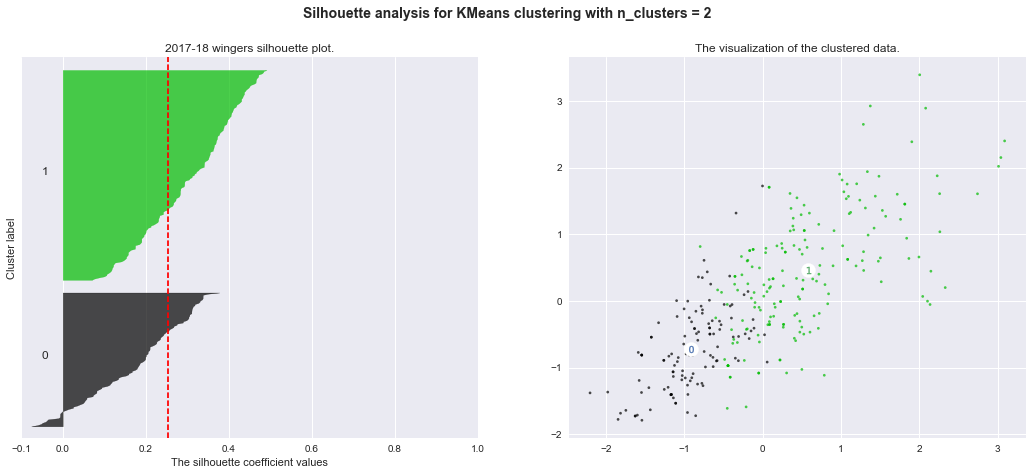

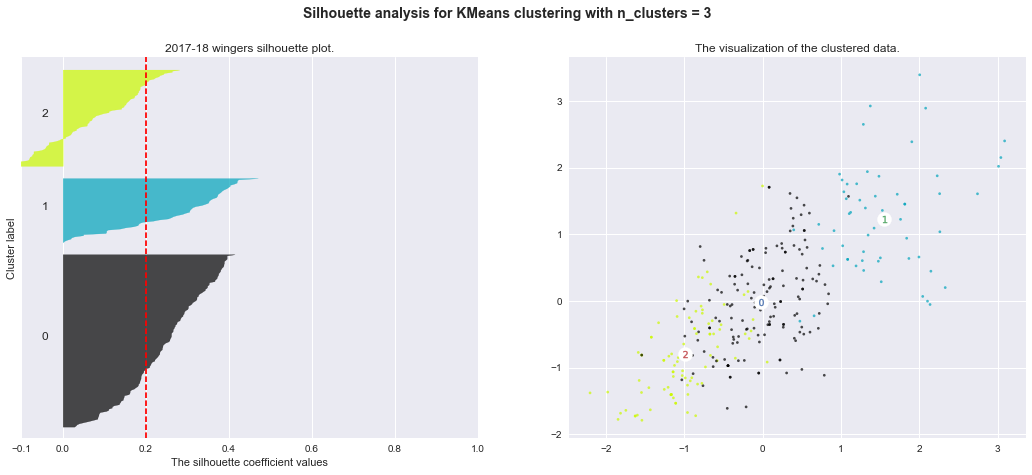

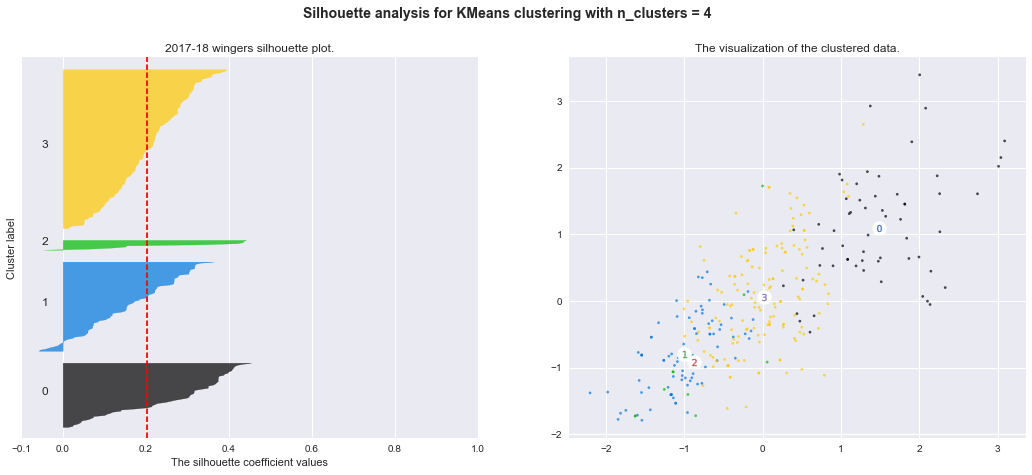

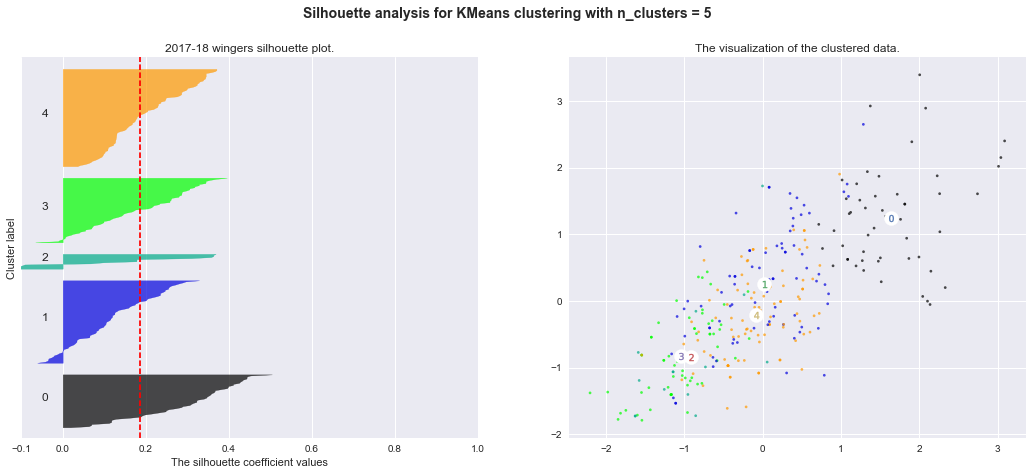

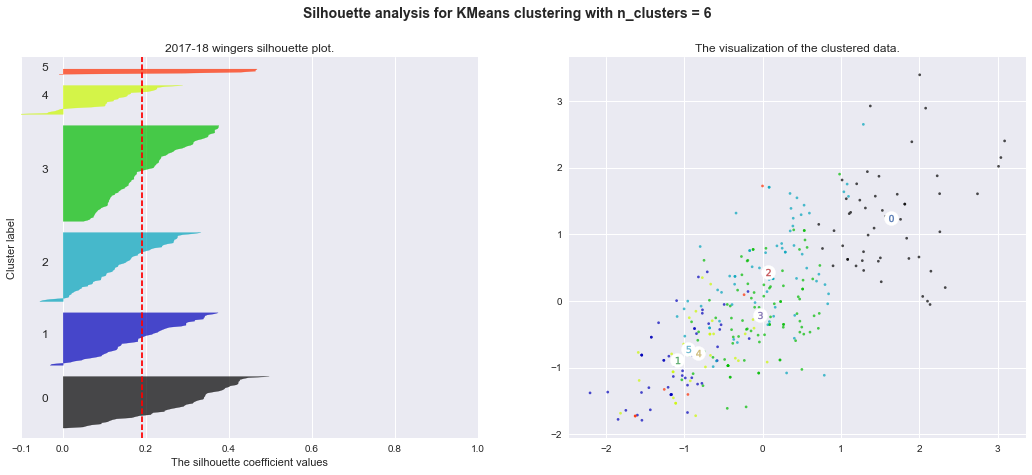

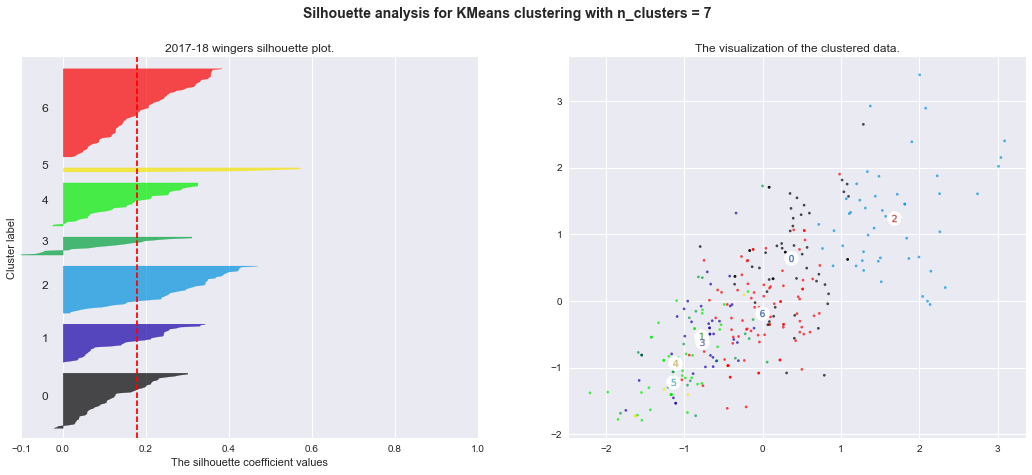

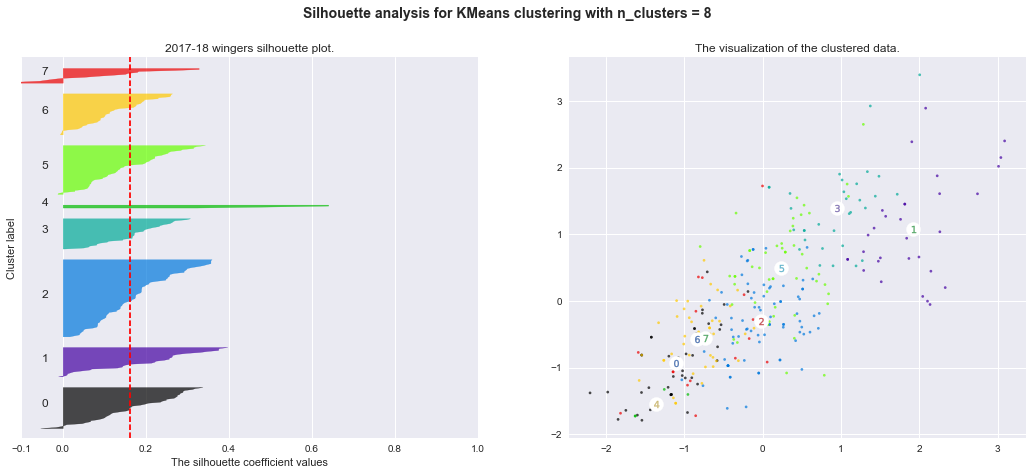

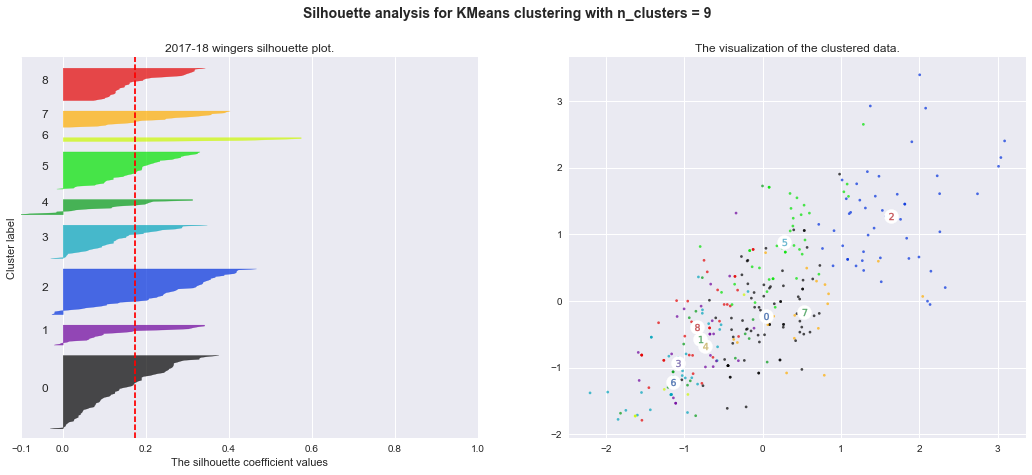

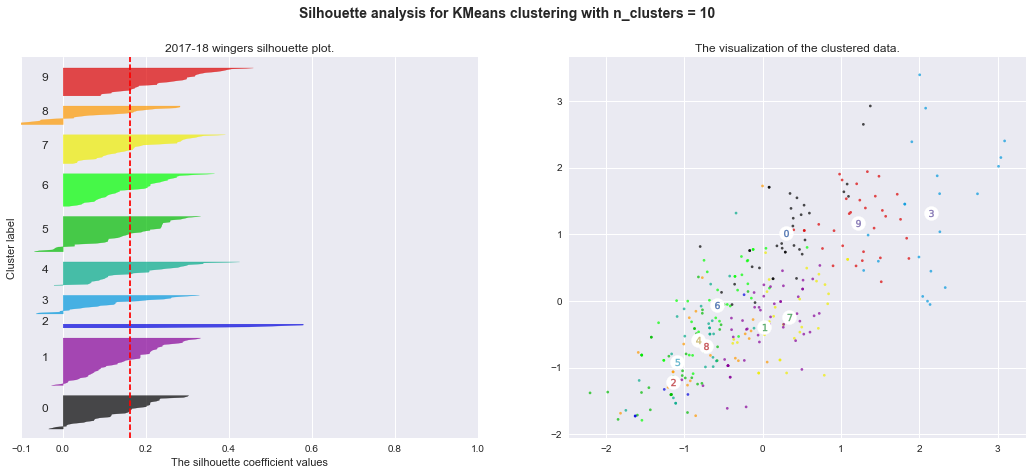

In [513]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(w_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( w_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(w_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(w_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("2017-18 wingers silhouette plot.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(w_scaled[:, 0], w_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

 
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_wingers_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering show that the number of clusters with the highest values of the eleven statistics used, are n = 2, 3, 4 with an average silhouette score of 0.294, 0.200, 0.196 respectfully.
<br>
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 4 forward lines, the optimal number of clusters for centers, left and right wingers are 4. 

- Top Line
- Second Line
- Third Line
- Fourth Line

In [557]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(w_scaled)

clusters_dw = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dw['cluster']=kmeans.labels_

clusters_dw

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,1.467325,1.117941,1.272847,0.964417,0.426214,-0.595487,-0.620276,-0.309791
1,-1.000175,-0.797006,-0.841453,-0.452708,0.068859,0.851567,0.849647,0.140557
2,-0.001318,0.035465,-0.028416,-0.084032,-0.133444,-0.282195,-0.399896,-0.244911
3,-0.876738,-0.913574,-0.576874,-1.040317,-1.258889,0.829214,2.717078,4.343833


In [559]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_wingers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

The table shows the 4 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing forwards. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 forwards is 0.55 standard deviations above the mean for all forwards.

In [791]:
#clusters_dw.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_wingers.csv')
#clusters_dw.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_wingers.csv')

### rank wingers

The next step is to rank players based on clusters:

- **Cluster 0** is for **1st** line (Top 3). 
- **Cluster 3** is for **2nd** second line (Top 6). 
- **Cluster 1** is for **3rd** third line (Top 9)
- **Cluster 2** is for **4th** fourth line (Bottom 3)

In [558]:
dw['Rank'] = dw.apply(lambda x: 1 if (x['cluster'] == 0) else 2 if (x['cluster'] == 2) else 3 if (x['cluster'] == 1) else 4, axis=1)
dw = dw.sort_values(['TPoints'], ascending=[False])
dw['Rank'].value_counts()

2    146
3     82
1     62
4     10
Name: Rank, dtype: int64

In [560]:
w2 = dw.copy()
w2 = w2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
w2 = w2[w2['Rank'] == 1]
w2 = w2.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
w2.head(10)

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
488,1,T.B,NIKITA KUCHEROV,80,100.0,0.063052,0.024590,0.038462,0.649433,0.482346,0.167087,0.013241,0.077554,0.035939,0.009458,0.019546,1586.0
553,1,N.J,TAYLOR HALL,76,93.0,0.063918,0.026804,0.037113,0.630241,0.460481,0.169759,0.011684,0.081100,0.039175,0.030241,0.049485,1455.0
56,1,PIT,PHIL KESSEL,82,92.0,0.060052,0.022193,0.037859,0.668407,0.492820,0.175587,-0.001958,0.080287,0.044386,0.011097,0.006527,1532.0
21,1,WPG,BLAKE WHEELER,81,91.0,0.055454,0.014016,0.041438,0.589884,0.492383,0.097502,0.007922,0.068251,0.038391,0.040219,0.057282,1641.0
304,1,WSH,ALEX OVECHKIN,82,87.0,0.052663,0.029661,0.023002,0.615617,0.452785,0.162833,0.007264,0.075666,0.038136,0.012712,0.084140,1652.0
160,1,BOS,BRAD MARCHAND,68,85.0,0.063386,0.025354,0.038031,0.598807,0.463087,0.135720,0.020880,0.081283,0.041760,0.018643,0.027591,1341.0
117,1,PHI,JAKUB VORACEK,82,85.0,0.053292,0.012539,0.040752,0.620690,0.460815,0.159875,0.005643,0.067712,0.033229,0.020063,0.014420,1595.0
231,1,COL,MIKKO RANTANEN,81,84.0,0.054688,0.018880,0.035807,0.597656,0.472656,0.125000,0.004557,0.078776,0.041016,0.026042,0.020833,1536.0
84,1,CGY,JOHNNY GAUDREAU,80,83.0,0.053411,0.015444,0.037967,0.649292,0.447876,0.201416,0.005792,0.067568,0.040541,0.011583,0.010296,1554.0
422,1,CBJ,ARTEMI PANARIN,81,82.0,0.050276,0.016554,0.033722,0.654200,0.447578,0.206622,0.015941,0.060086,0.026977,0.011649,0.009197,1631.0


# Defensemen

In [561]:
dwd = da.copy()
dwd = dwd[dwd['Position'] == 'D']
dwd = dwd.sort_values(['TGP', 'TTOI'], ascending=[True, True])
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
819,2017,DET,BRIAN LASHOFF,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,-2,1,2,-1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,-0.500000,0.250000,0.500000,-0.250000,0.000000,0.000000,0.00,0.0,0.0,0.0
713,2017,CAR,TREVOR CARRICK,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,-3,2,5,-3,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.250000,0.625000,-0.375000,0.250000,0.625000,-0.375000,0.000000,0.000000,0.25,0.0,0.0,0.0
784,2017,PHI,WILL O'NEILL,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3,4,-1,3,4,-1,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.444444,-0.111111,0.333333,0.444444,-0.111111,0.000000,0.000000,0.00,0.0,0.0,0.0
1022,2017,OTT,PATRICK SIELOFF,D,1,1.0,0.0,1.0,1.0,3.0,1.0,3.0,-2.0,2.0,8,10,-2,8,10,-2,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.090909,0.000000,0.090909,0.090909,0.272727,0.090909,0.272727,-0.181818,0.181818,0.727273,0.909091,-0.181818,0.727273,0.909091,-0.181818,0.090909,0.090909,0.00,0.0,0.0,0.0
1056,2017,L.A,DANIEL BRICKLEY,D,1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2,3,-1,2,3,-1,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.000000,0.090909,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.000000,0.181818,0.272727,-0.090909,0.181818,0.272727,-0.090909,0.090909,0.090909,0.00,0.0,0.0,0.0


In [562]:
dwd.shape

(324, 48)

## defensemen time on ice distribution

- time on ice distribution will determine the quantity of players to include in the cluster analysis. Players that have played a signficant low total of minutes will be excluded from clustering and assign directly to the bottom defensive pairing.

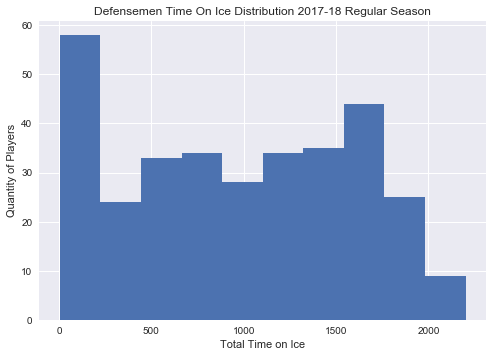

In [563]:
x3 = dwd.TTOI 
plt.title('Defensemen Time On Ice Distribution 2017-18 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(220,225)
plt.hist(x3)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_defensemen_toi.pdf')
plt.show()

- Defensemen that have played less than 240 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 3rd pairing defensemen.

In [564]:
low = dwd.copy()
low = low[low['TTOI'] < 225]
low.shape

(58, 48)

In [565]:
dwd = dwd[dwd['TTOI'] > 225]
dwd.shape

(265, 48)

In [566]:
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
200,2017,BUF,MATT TENNYSON,D,15,0.0,0.0,0.0,11.0,19.0,10.0,18.0,-8.0,25.0,133,140,-7,112,136,-24,11.0,13.0,8.0,1.0,6.0,6.0,270.0,0.000000,0.000000,0.000000,0.040741,0.070370,0.037037,0.066667,-0.029630,0.092593,0.492593,0.518519,-0.025926,0.414815,0.503704,-0.088889,0.040741,0.048148,0.029630,0.003704,0.022222,0.022222
949,2017,NYR,RYAN SPROUL,D,16,1.0,4.0,5.0,10.0,15.0,10.0,15.0,-5.0,14.0,124,146,-22,121,144,-23,16.0,6.0,6.0,5.0,8.0,13.0,262.0,0.003817,0.015267,0.019084,0.038168,0.057252,0.038168,0.057252,-0.019084,0.053435,0.473282,0.557252,-0.083969,0.461832,0.549618,-0.087786,0.061069,0.022901,0.022901,0.019084,0.030534,0.049618
89,2017,CGY,MATT BARTKOWSKI,D,18,0.0,3.0,3.0,7.0,10.0,7.0,10.0,-3.0,21.0,106,142,-36,106,125,-19,13.0,31.0,4.0,3.0,18.0,5.0,240.0,0.000000,0.012500,0.012500,0.029167,0.041667,0.029167,0.041667,-0.012500,0.087500,0.441667,0.591667,-0.150000,0.441667,0.520833,-0.079167,0.054167,0.129167,0.016667,0.012500,0.075000,0.020833
335,2017,MIN,KYLE QUINCEY,D,18,0.0,3.0,3.0,8.0,17.0,8.0,12.0,-4.0,11.0,101,173,-72,101,129,-28,18.0,21.0,28.0,6.0,16.0,2.0,257.0,0.000000,0.011673,0.011673,0.031128,0.066148,0.031128,0.046693,-0.015564,0.042802,0.392996,0.673152,-0.280156,0.392996,0.501946,-0.108949,0.070039,0.081712,0.108949,0.023346,0.062257,0.007782
874,2017,MTL,BRETT LERNOUT,D,18,0.0,1.0,1.0,6.0,14.0,6.0,11.0,-5.0,14.0,124,162,-38,124,148,-24,18.0,56.0,6.0,4.0,11.0,10.0,301.0,0.000000,0.003322,0.003322,0.019934,0.046512,0.019934,0.036545,-0.016611,0.046512,0.411960,0.538206,-0.126246,0.411960,0.491694,-0.079734,0.059801,0.186047,0.019934,0.013289,0.036545,0.033223


## clusters for defensemen

In [567]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
d = dwd[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
d_scaled = scaler.fit_transform(d)

### dendrogram

In [568]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [569]:
sn.clustermap(d_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [570]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( d_scaled )
  cluster_errors.append( clusters.inertia_ )

In [571]:
clusters_dwd = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dwd[0:10]

,cluster_errors,num_clusters
0,2120.000000,1
1,1600.331445,2
2,1386.941129,3
3,1245.442491,4
4,1141.999739,5
5,1057.692359,6
6,983.308867,7
7,929.838621,8
8,896.271128,9
9,863.672258,10


In [572]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_defensemen_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

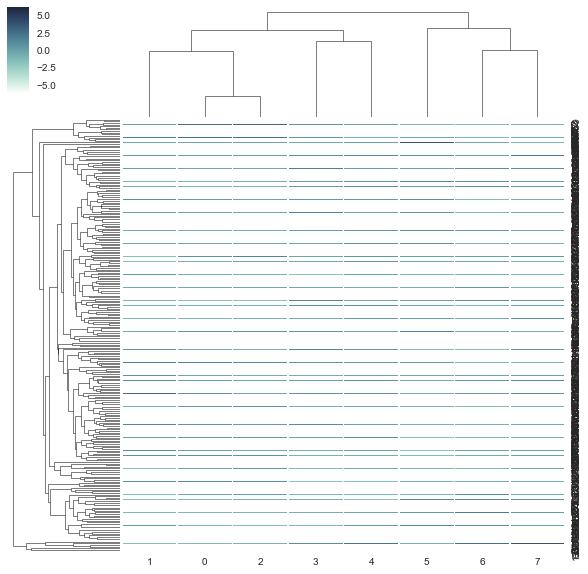

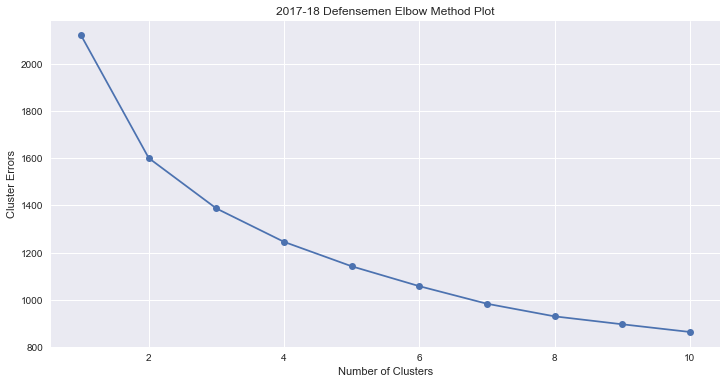

In [573]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dwd.num_clusters, clusters_dwd.cluster_errors, marker = "o" )
plt.title('2017-18 Defensemen Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_defensemen_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.213826563418
For n_clusters = 3 The average silhouette_score is : 0.185544115685
For n_clusters = 4 The average silhouette_score is : 0.165947273408
For n_clusters = 5 The average silhouette_score is : 0.166381748484
For n_clusters = 6 The average silhouette_score is : 0.167078545946
For n_clusters = 7 The average silhouette_score is : 0.151621339185
For n_clusters = 8 The average silhouette_score is : 0.154157804577
For n_clusters = 9 The average silhouette_score is : 0.15759426754
For n_clusters = 10 The average silhouette_score is : 0.151788783787


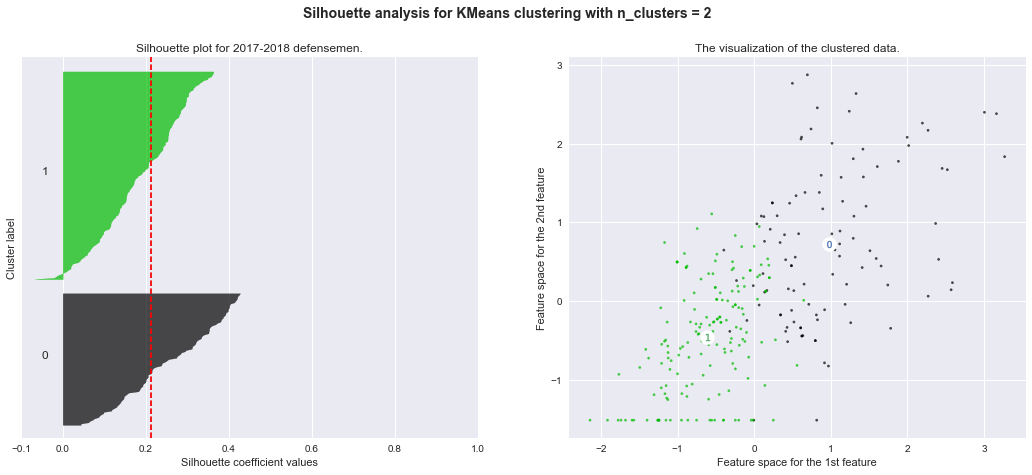

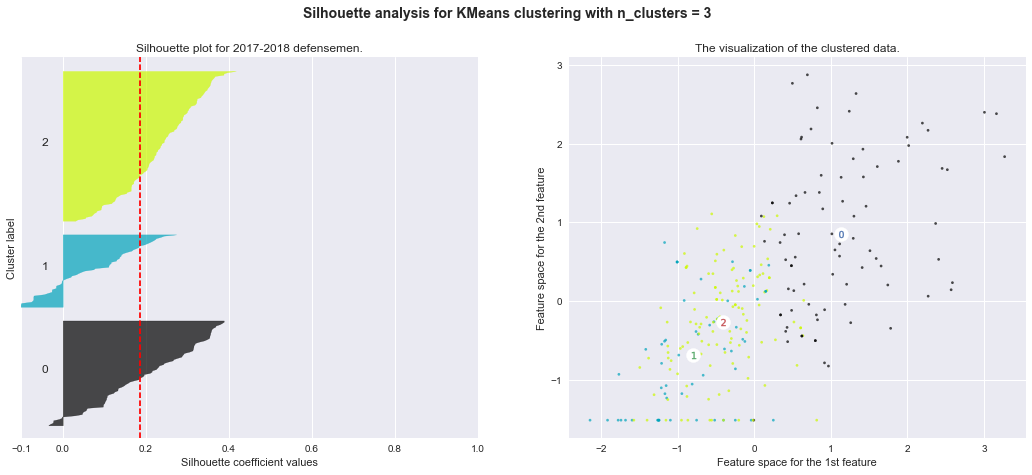

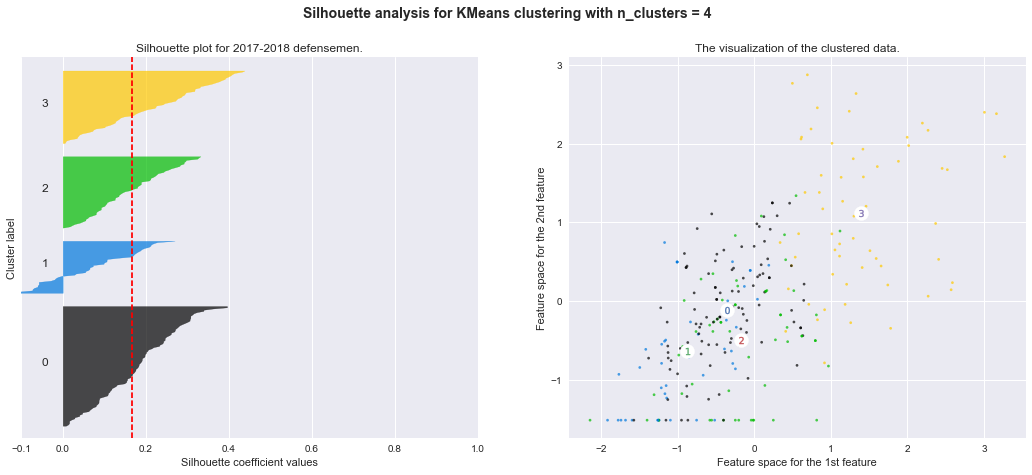

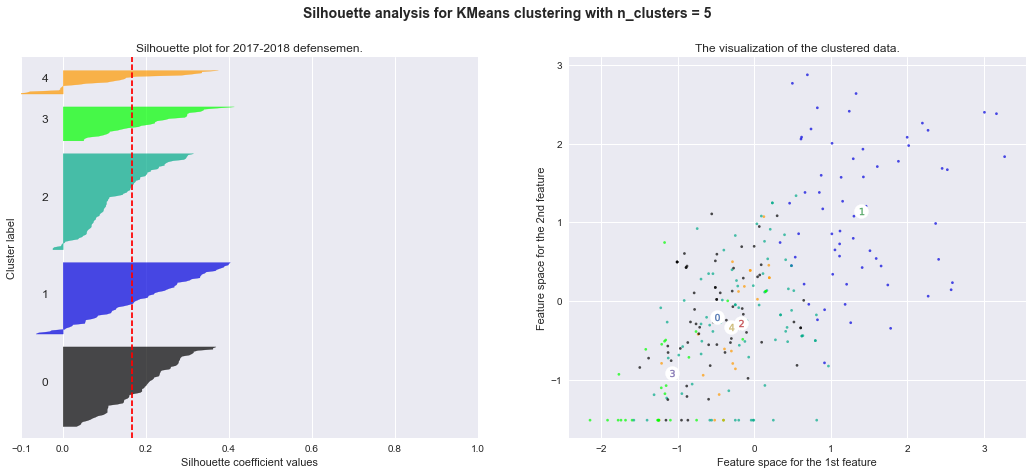

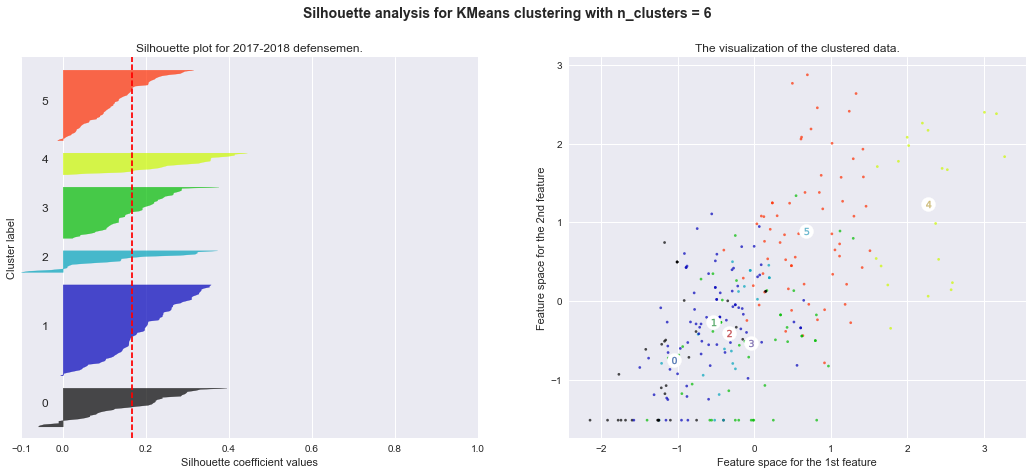

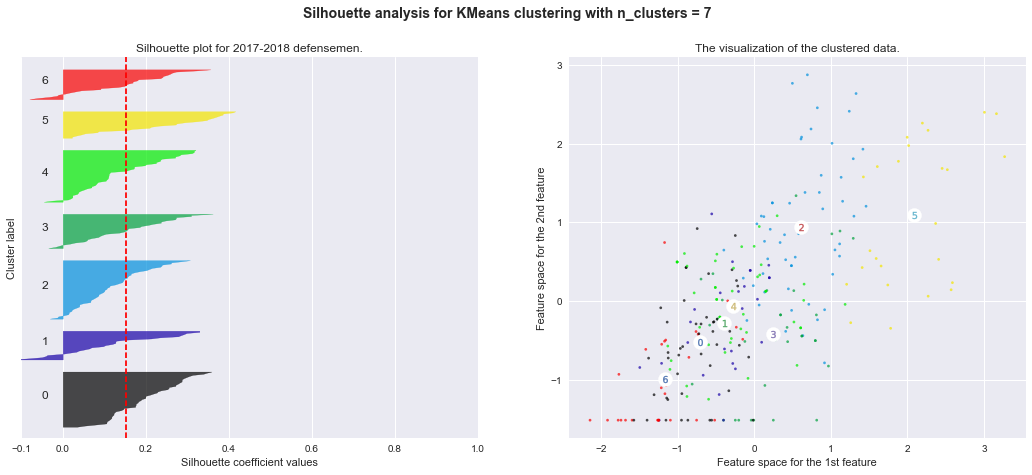

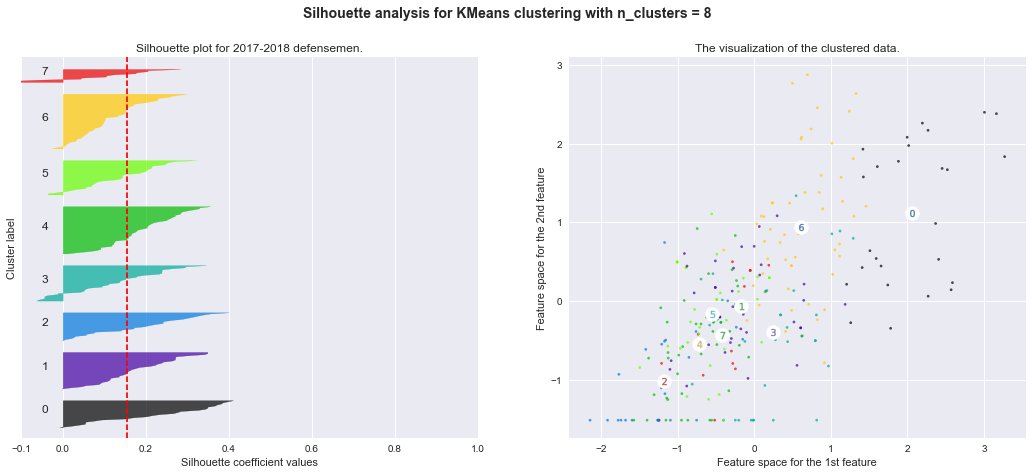

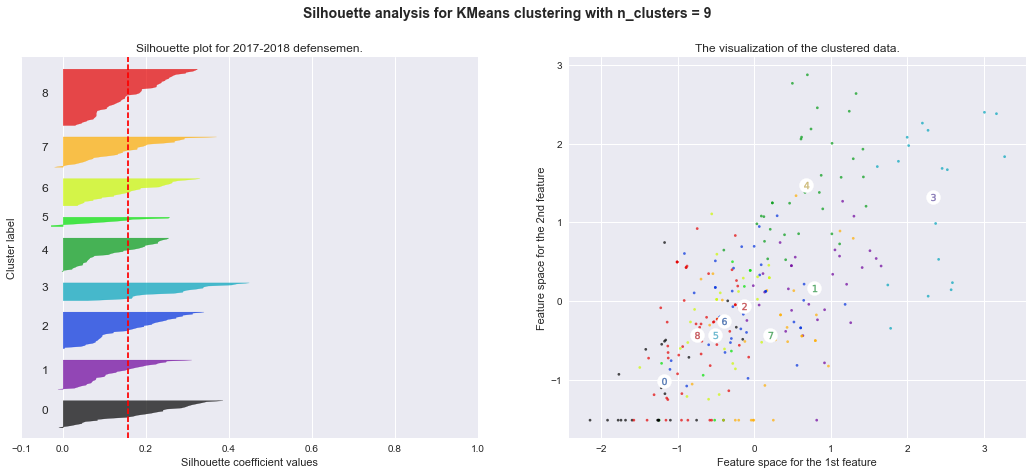

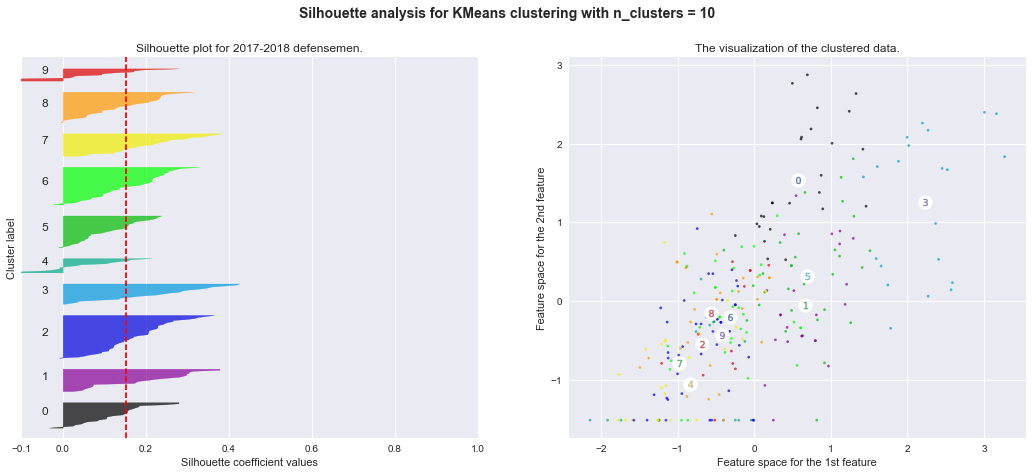

In [574]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(d_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( d_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(d_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(d_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2017-2018 defensemen.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(d_scaled[:, 0], d_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_defensemen_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of defensemen shows that the number of clusters with the highest values of the eleven statistics used, are $n$ = 2, 3, 4. These clusters have an average silhouette score of 0.249, 0.173 and 0.141 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 3 defensive pairings, the optimal number of clusters for left and right defensemen are 3. 
- Top Two Defensive Pairing (LD, RD)
- Top Four Defensive Pairing (LD, RD)
- Bottom Defensive Pairing (LD, RD)


In [586]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(d_scaled)

clusters_dwd = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dwd['cluster']=kmeans.labels_

clusters_dwd

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,1.215592,0.881417,1.125879,0.165600,0.094828,-0.805518,-0.503451,-0.350115
1,-0.346243,-0.201148,-0.340206,0.298581,0.286886,0.426638,-0.241491,-0.199689
2,-0.798733,-0.678183,-0.701062,-0.794822,-0.685119,0.138019,1.094479,0.824126


In [589]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_defensemen_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

In [590]:
#clusters_dwd.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_defensemen.csv')
#clusters_dwd.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_defensemen.csv')

The table shows the 3 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing defensemen. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 defesemen is 0.59 standard deviations above the mean for all defensemen.

### rank defensemen

The next step is to rank players based on clusters:

- **Cluster 1** is for **1st** pairing defensemen (Top 2). 
- **Cluster 2** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 0** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [591]:
dwd['Rank'] = dwd.apply(lambda x: 1 if (x['cluster'] == 0) else 2 if (x['cluster'] == 1) else 3, axis=1)
dwd = dwd.sort_values(['TPoints'], ascending=[False])
dwd['Rank'].value_counts()

2    125
1     77
3     63
Name: Rank, dtype: int64

In [592]:
d2 = dwd.copy()
d2 = d2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIHits', 'TOIBlocks', 'TTOI']]
d2 = d2[d2['Rank'] == 1]
d2 = d2.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
d2.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIHits,TOIBlocks,TTOI
296,1,WSH,JOHN CARLSON,82,68.0,0.033465,0.023130,0.070866,2032.0
502,1,DAL,JOHN KLINGBERG,82,67.0,0.033941,0.022290,0.053698,1974.0
144,1,S.J,BRENT BURNS,82,67.0,0.032367,0.038164,0.064251,2070.0
129,1,PHI,SHAYNE GOSTISBEHERE,78,65.0,0.038829,0.031661,0.068698,1674.0
484,1,T.B,VICTOR HEDMAN,77,63.0,0.031658,0.069849,0.055276,1990.0


# Goaltenders

In [625]:
dglt = da.copy()
dglt = dglt[dglt['Position'] == 'G']
dglt.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
5,2017,TOR,FREDERIK ANDERSEN,G,66,0.0,1.0,1.0,165.0,178.0,165.0,148.0,17.0,1.0,1698,2152,-454,1698,1880,-182,0.0,0.0,2.0,0.0,42.0,0.0,3889.0,0.0,0.000257,0.000257,0.042427,0.045770,0.042427,0.038056,0.004371,0.000257,0.436616,0.553356,-0.116740,0.436616,0.483415,-0.046799,0.0,0.0,0.000514,0.0,0.010800,0.0
24,2017,WPG,STEVE MASON,G,13,0.0,1.0,1.0,23.0,37.0,23.0,27.0,-4.0,0.0,307,381,-74,307,304,3,0.0,0.0,0.0,0.0,9.0,0.0,686.0,0.0,0.001458,0.001458,0.033528,0.053936,0.033528,0.039359,-0.005831,0.000000,0.447522,0.555394,-0.107872,0.447522,0.443149,0.004373,0.0,0.0,0.000000,0.0,0.013120,0.0
38,2017,WPG,CONNOR HELLEBUYCK,G,67,0.0,2.0,2.0,170.0,152.0,170.0,114.0,56.0,0.0,1750,1983,-233,1750,1598,152,0.0,0.0,0.0,0.0,38.0,0.0,3966.0,0.0,0.000504,0.000504,0.042864,0.038326,0.042864,0.028744,0.014120,0.000000,0.441251,0.500000,-0.058749,0.441251,0.402925,0.038326,0.0,0.0,0.000000,0.0,0.009581,0.0
44,2017,PIT,MATT MURRAY,G,49,0.0,1.0,1.0,103.0,132.0,103.0,103.0,0.0,0.0,1330,1384,-54,1330,1162,168,0.0,0.0,2.0,0.0,13.0,0.0,2733.0,0.0,0.000366,0.000366,0.037688,0.048299,0.037688,0.037688,0.000000,0.000000,0.486645,0.506403,-0.019759,0.486645,0.425174,0.061471,0.0,0.0,0.000732,0.0,0.004757,0.0
63,2017,STL,JAKE ALLEN,G,59,0.0,1.0,1.0,125.0,146.0,125.0,110.0,15.0,0.0,1502,1574,-72,1502,1357,145,0.0,0.0,0.0,0.0,21.0,0.0,3320.0,0.0,0.000301,0.000301,0.037651,0.043976,0.037651,0.033133,0.004518,0.000000,0.452410,0.474096,-0.021687,0.452410,0.408735,0.043675,0.0,0.0,0.000000,0.0,0.006325,0.0


- calculate saves for each goaltender for the season.

In [626]:
dglt['TSaves'] = dglt['TShotsA'] - dglt['TGoalsA']
dglt['TEVSaves'] = dglt['TEVShotsA'] - dglt['TEVGoalsA']

- compute save ratio and goal against ratio for all situations and even strength situations respectfully.

In [627]:
dglt['TSaveShotARatio'] = dglt['TSaves']/dglt['TShotsA']
dglt['TShotGoalARatio'] = dglt['TShotsA']/dglt['TGoalsA']

dglt['TEVSaveShotARatio'] = dglt['TEVSaves']/dglt['TEVShotsA']
dglt['TEVShotGoalARatio'] = dglt['TEVShotsA']/dglt['TEVGoalsA']

dglt['TSaveShotARatio'] = dglt['TSaveShotARatio'].round(3)
dglt['TShotGoalARatio'] = dglt['TShotGoalARatio'].round(3)
dglt['TEVSaveShotARatio'] = dglt['TEVSaveShotARatio'].round(3)
dglt['TEVShotGoalARatio'] = dglt['TEVShotGoalARatio'].round(3)

- scale all variables by time on ice.

In [628]:
dglt['TOISaves'] = dglt['TSaves']/dglt['TTOI']
dglt['TOIEVSaves'] = dglt['TEVSaves']/dglt['TTOI']

dglt['TOISaveShotARatio'] = dglt['TSaveShotARatio']/dglt['TTOI']
dglt['TOIShotGoalARatio'] = dglt['TShotGoalARatio']/dglt['TTOI']

dglt['TOIEVSaveShotARatio'] = dglt['TEVSaveShotARatio']/dglt['TTOI']
dglt['TOIEVShotGoalARatio'] = dglt['TEVShotGoalARatio']/dglt['TTOI']

In [629]:
dglt.shape

(102, 60)

## goaltenders time on ice distribution

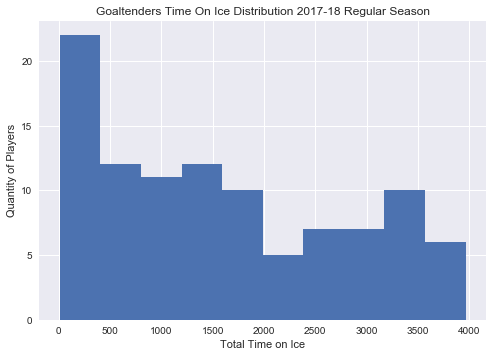

In [630]:
x4 = dglt.TTOI 
plt.title('Goaltenders Time On Ice Distribution 2017-18 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(400,410)
plt.hist(x4)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_goaltenders_toi.pdf')
plt.show()

- Goaltenders that have played less than 420 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as bottom goaltenders.

In [631]:
low = dglt.copy()
low = low[low['TTOI'] < 420]
low.shape

(22, 60)

In [632]:
dglt = dglt[dglt['TTOI'] > 420]
dglt.shape

(80, 60)

In [633]:
#dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')
#dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')

## clusters for goaltenders

In [634]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
g = dglt[['TSaveShotARatio', 'TShotGoalARatio']]
g_scaled = scaler.fit_transform(g)

### dendrogram

In [635]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [636]:
sn.clustermap(g_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [637]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( g_scaled )
  cluster_errors.append( clusters.inertia_ )

In [638]:
clusters_dglt = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dglt[0:10]

,cluster_errors,num_clusters
0,160.000000,1
1,63.030531,2
2,29.819739,3
3,18.030836,4
4,11.304902,5
5,6.991453,6
6,5.419791,7
7,4.207309,8
8,3.090211,9
9,2.443892,10


In [639]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_goaltenders_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

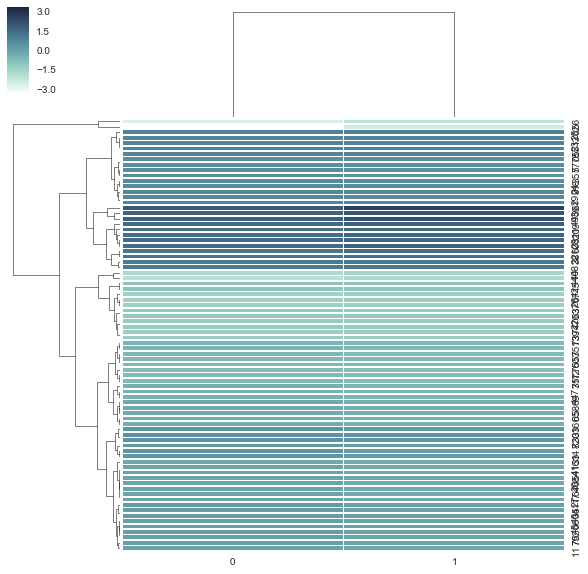

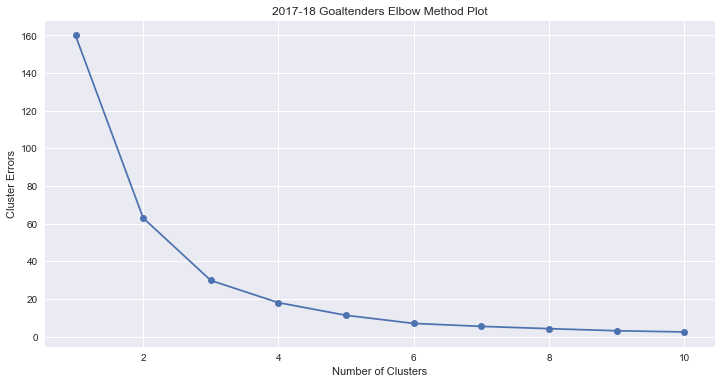

In [640]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dglt.num_clusters, clusters_dglt.cluster_errors, marker = "o" )
plt.title('2017-18 Goaltenders Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_goaltenders_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.531471460815
For n_clusters = 3 The average silhouette_score is : 0.558139720301
For n_clusters = 4 The average silhouette_score is : 0.563077181685
For n_clusters = 5 The average silhouette_score is : 0.558925774528
For n_clusters = 6 The average silhouette_score is : 0.582562023007
For n_clusters = 7 The average silhouette_score is : 0.574027495492
For n_clusters = 8 The average silhouette_score is : 0.559890659133
For n_clusters = 9 The average silhouette_score is : 0.558397240476
For n_clusters = 10 The average silhouette_score is : 0.551579180317


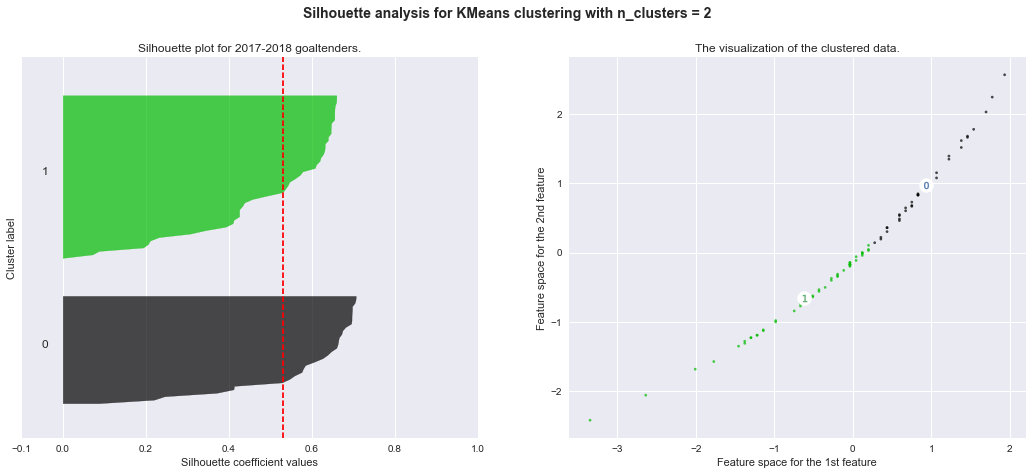

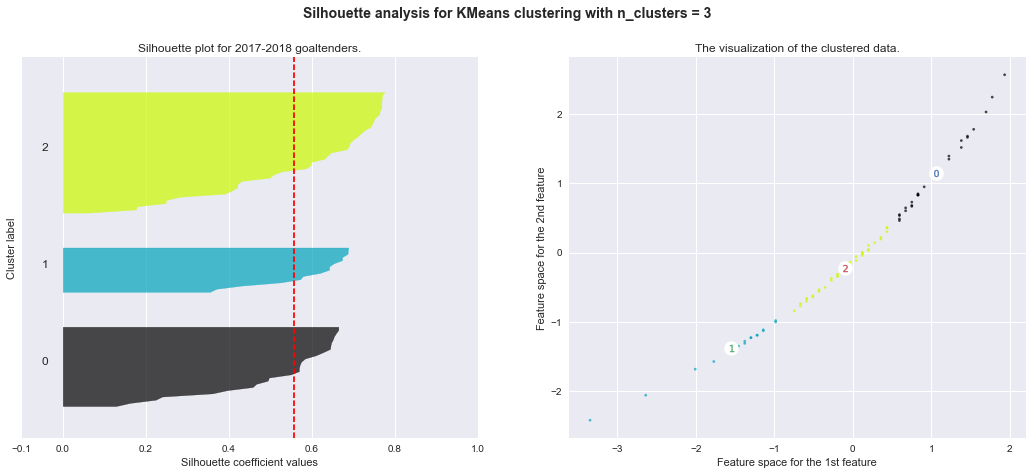

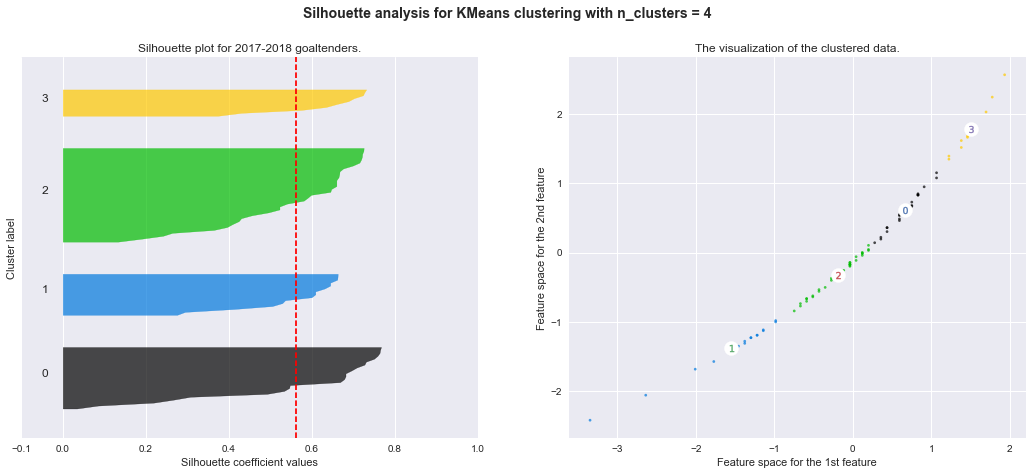

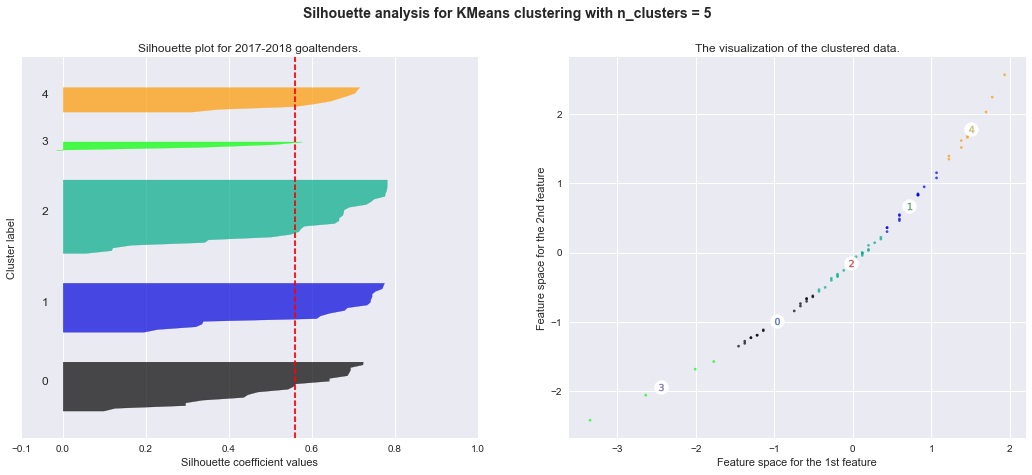

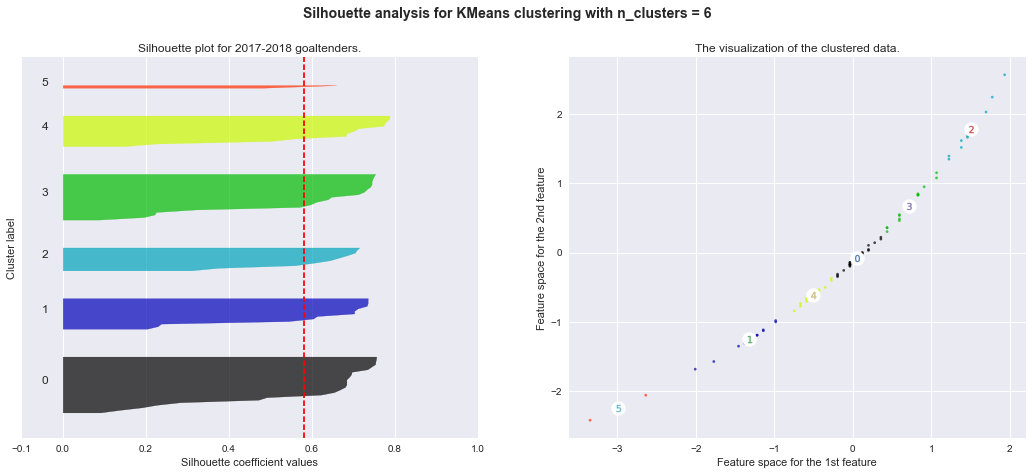

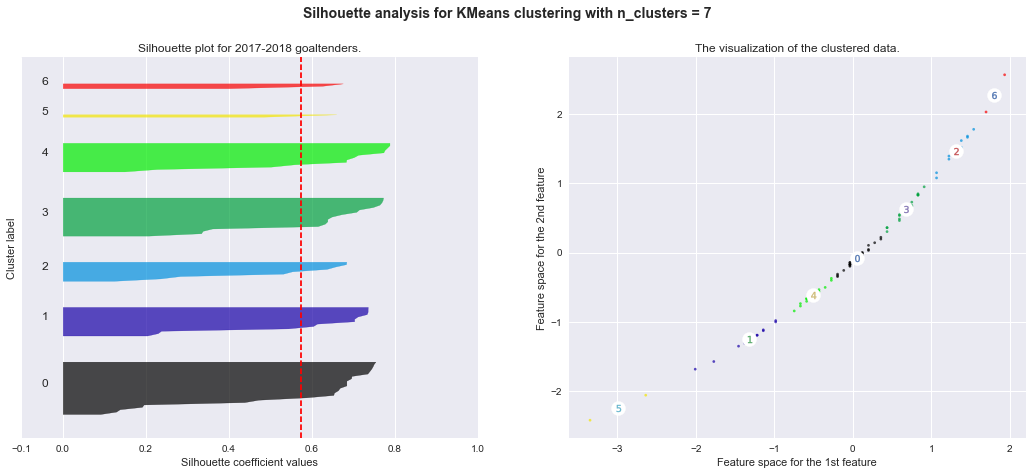

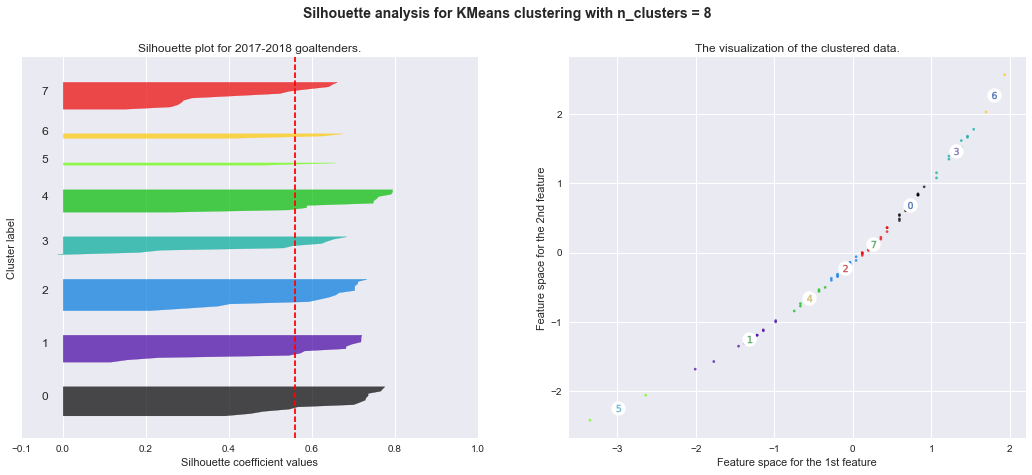

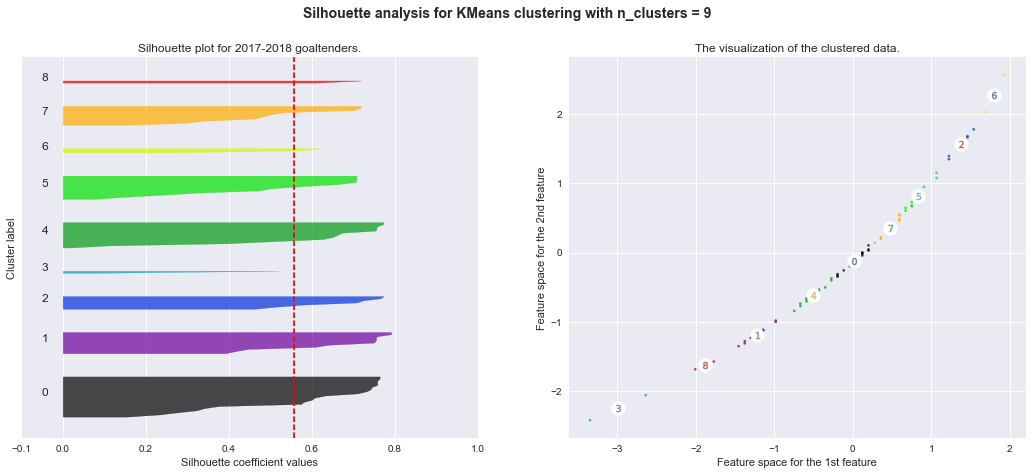

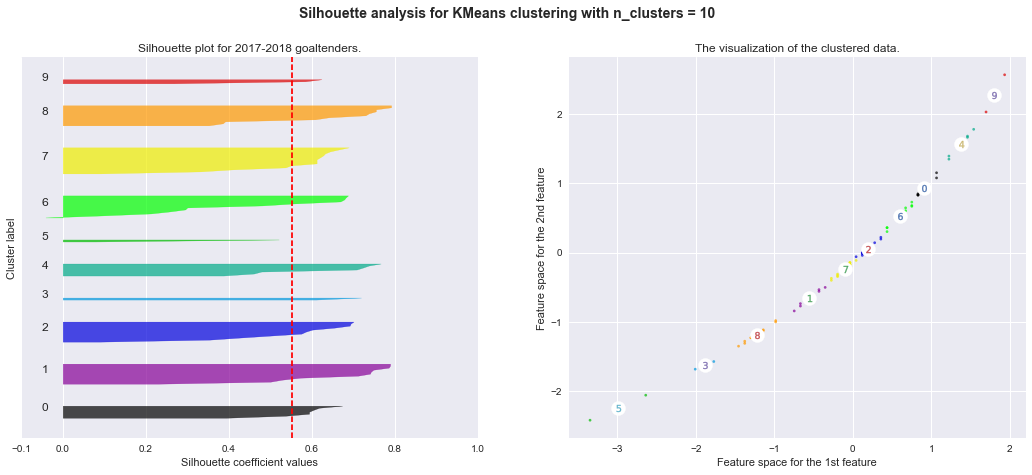

In [641]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(g_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( g_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(g_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(g_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2017-2018 goaltenders.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(g_scaled[:, 0], g_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_goaltenders_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of goaltenders shows that the number of clusters with the highest values of the three statistics used, are $n$ = 3, 4, 10. These clusters have an average silhouette score of 0.441, 0.425 and 0.430 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, the optimal number of clusters for goaltenders are 3. 
- Top
- Average
- Bottom


In [642]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(g_scaled)

clusters_dglt = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TSaveShotARatio', 'TShotGoalARatio'])

dglt['cluster']=kmeans.labels_

clusters_dglt

,TSaveShotARatio,TShotGoalARatio
0,-0.106101,-0.229732
1,1.053388,1.143757
2,-1.550009,-1.385209


In [643]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_goaltenders_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

In [644]:
#clusters_dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_goaltenders.csv')
#clusters_dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_goaltenders.csv')

### rank goaltenders

The next step is to rank players based on clusters:

- **Cluster 1** is for **1st** pairing defensemen (Top 2). 
- **Cluster 0** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 2** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [645]:
dglt['Rank'] = dglt.apply(lambda x: 1 if (x['cluster'] == 1) else 2 if (x['cluster'] == 0) else 3, axis=1)
dglt = dglt.sort_values(['TSaves'], ascending=[False])
dglt['Rank'].value_counts()

2    39
1    26
3    15
Name: Rank, dtype: int64

In [646]:
g2 = dglt.copy()
g2 = g2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TSaveShotARatio', 'TShotGoalARatio', 'TEVSaveShotARatio', 'TEVShotGoalARatio',  'TSaves', 'TGoalsA', 'TShotsA', 'TOISaves', 'TOIGoalsA', 'TOIShotsA', 'TPoints', 'TOIPoints']]
g2 = g2[g2['Rank'] == 1]
g2 = g2.sort_values(['TSaveShotARatio', 'TEVShotGoalARatio'], ascending=[False, False])
g2.tail(25)

,Rank,TeamCode,PlayerName,TGP,TPoints,TSaveShotARatio,TShotGoalARatio,TEVSaveShotARatio,TEVShotGoalARatio,TSaves,TGoalsA,TShotsA,TOISaves,TOIGoalsA,TOIShotsA,TPoints,TOIPoints
649,1,STL,CARTER HUTTON,32,0.0,0.932,14.736,0.937,15.929,728.0,53.0,781,0.452174,0.032919,0.485093,0.0,0.000000
603,1,ARI,ANTTI RAANTA,47,0.0,0.931,14.404,0.937,15.808,1260.0,94.0,1354,0.484802,0.036168,0.520970,0.0,0.000000
348,1,CHI,COREY CRAWFORD,28,0.0,0.929,14.017,0.934,15.133,755.0,58.0,813,0.476641,0.036616,0.513258,0.0,0.000000
771,1,ANA,RYAN MILLER,28,0.0,0.928,13.865,0.941,17.000,669.0,52.0,721,0.494457,0.038433,0.532890,0.0,0.000000
466,1,FLA,ROBERTO LUONGO,35,2.0,0.928,13.838,0.933,14.828,1027.0,80.0,1107,0.522380,0.040692,0.563072,2.0,0.001017
177,1,NSH,PEKKA RINNE,59,1.0,0.927,13.611,0.939,16.275,1652.0,131.0,1783,0.474986,0.037665,0.512651,1.0,0.000288
524,1,VGK,MARC-ANDRE FLEURY,46,1.0,0.927,13.765,0.931,14.494,1251.0,98.0,1349,0.468013,0.036663,0.504676,1.0,0.000374
574,1,NSH,JUUSE SAROS,26,3.0,0.925,13.350,0.930,14.283,741.0,60.0,801,0.494990,0.040080,0.535070,3.0,0.002004
368,1,ANA,JOHN GIBSON,60,1.0,0.925,13.419,0.927,13.748,1689.0,136.0,1825,0.492707,0.039673,0.532380,1.0,0.000292
643,1,WSH,PHILIPP GRUBAUER,35,1.0,0.923,12.931,0.934,15.176,859.0,72.0,931,0.460590,0.038606,0.499196,1.0,0.000536


# combine center, winger, defenseman and goaltender dataframes

In [647]:
dataframes = [dc, dw, dwd,dglt]
#dataframes = [dww, dwd]
dr = pd.concat(dataframes)
dr = dr.sort_values(['Position', 'Rank'], ascending=[True, True])
dr.head()

,PlayerName,Position,Rank,Season,TAssists,TBlocks,TDShots,TEVDShots,TEVGoalsA,TEVGoalsF,TEVSaveShotARatio,TEVSaves,TEVShotGoalARatio,TEVShotsA,TEVShotsF,TGP,TGiveaways,TGoals,TGoalsA,TGoalsF,THits,TMisses,TOIAssists,TOIBlocks,TOIDShots,TOIEVDShots,TOIEVGoalsA,TOIEVGoalsF,TOIEVSaveShotARatio,TOIEVSaves,TOIEVShotGoalARatio,TOIEVShotsA,TOIEVShotsF,TOIGiveaways,TOIGoals,TOIGoalsA,TOIGoalsF,TOIHits,TOIMisses,TOIPenalties,TOIPlus/Minus,TOIPoints,TOISaveShotARatio,TOISaves,TOIShotGoalARatio,TOIShots,TOIShotsA,TOIShotsF,TOITakeaways,TPenalties,TPlus/Minus,TPoints,TSaveShotARatio,TSaves,TShotGoalARatio,TShots,TShotsA,TShotsF,TTOI,TTakeaways,TeamCode,cluster
103,CONNOR MCDAVID,C,1,2017,67.0,46.0,232,61,70.0,98.0,NaN,NaN,NaN,821,882,82,67.0,41.0,80.0,120.0,28.0,82.0,0.037917,0.026033,0.131296,0.034522,0.039615,0.055461,NaN,NaN,NaN,0.464629,0.499151,0.037917,0.023203,0.045274,0.067912,0.015846,0.046406,0.007923,0.015846,0.061121,NaN,NaN,NaN,0.131862,0.499717,0.631013,0.062818,14.0,28.0,108.0,NaN,NaN,NaN,233.0,883,1115,1767.0,111.0,EDM,2
116,CLAUDE GIROUX,C,1,2017,68.0,23.0,333,52,54.0,80.0,NaN,NaN,NaN,663,715,82,44.0,34.0,62.0,129.0,30.0,59.0,0.040719,0.013772,0.199401,0.031138,0.032335,0.047904,NaN,NaN,NaN,0.397006,0.428144,0.026347,0.020359,0.037126,0.077246,0.017964,0.035329,0.011976,0.015569,0.061078,NaN,NaN,NaN,0.095210,0.423353,0.622754,0.020359,20.0,26.0,102.0,NaN,NaN,NaN,159.0,707,1040,1670.0,34.0,PHI,2
55,EVGENI MALKIN,C,1,2017,56.0,32.0,311,18,56.0,70.0,NaN,NaN,NaN,694,712,78,73.0,42.0,57.0,119.0,47.0,67.0,0.037812,0.021607,0.209993,0.012154,0.037812,0.047265,NaN,NaN,NaN,0.468602,0.480756,0.049291,0.028359,0.038488,0.080351,0.031735,0.045240,0.058744,0.009453,0.066172,NaN,NaN,NaN,0.133693,0.469953,0.679946,0.050641,87.0,14.0,98.0,NaN,NaN,NaN,198.0,696,1007,1481.0,75.0,PIT,2
229,NATHAN MACKINNON,C,1,2017,58.0,22.0,171,-55,61.0,79.0,NaN,NaN,NaN,695,640,74,41.0,39.0,64.0,125.0,38.0,109.0,0.039375,0.014936,0.116090,-0.037339,0.041412,0.053632,NaN,NaN,NaN,0.471826,0.434487,0.027834,0.026477,0.043449,0.084861,0.025798,0.073999,0.037339,0.012220,0.065852,NaN,NaN,NaN,0.166327,0.482010,0.598099,0.024440,55.0,18.0,97.0,NaN,NaN,NaN,245.0,710,881,1473.0,36.0,COL,2
401,ANZE KOPITAR,C,1,2017,57.0,64.0,146,33,54.0,75.0,NaN,NaN,NaN,689,722,82,70.0,35.0,66.0,108.0,50.0,64.0,0.031474,0.035340,0.080618,0.018222,0.029818,0.041414,NaN,NaN,NaN,0.380453,0.398675,0.038653,0.019326,0.036444,0.059636,0.027609,0.035340,0.011044,0.011596,0.050801,NaN,NaN,NaN,0.091662,0.464384,0.545003,0.029818,20.0,21.0,92.0,NaN,NaN,NaN,166.0,841,987,1811.0,54.0,L.A,2


In [648]:
dr['Rank'].value_counts()

2    383
1    216
3    200
4     52
Name: Rank, dtype: int64

In [649]:
dr.shape

(851, 62)

- create and save new dataframe that contains season, team code, player number, player name, position and rank columns.

In [650]:
drs = dr[['Season', 'TeamCode', 'PlayerName', 'Position', 'Rank']]

In [651]:
drs.shape

(851, 5)

In [652]:
drs.head()

,Season,TeamCode,PlayerName,Position,Rank
103,2017,EDM,CONNOR MCDAVID,C,1
116,2017,PHI,CLAUDE GIROUX,C,1
55,2017,PIT,EVGENI MALKIN,C,1
229,2017,COL,NATHAN MACKINNON,C,1
401,2017,L.A,ANZE KOPITAR,C,1


In [653]:
drs.isnull().sum()

Season        0
TeamCode      0
PlayerName    0
Position      0
Rank          0
dtype: int64

unclustered forwards will be added to the bottom line (4th) per position. Unclustered defensemen and goaltenders will be added to bottom defensive paring and bottom goaltender respectfully.

In [654]:
drs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2017_player_rank.csv')
#dr.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/2017_player_rank.csv')